In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from datetime import datetime

# Load actors with score

In [4]:
actors = pd.read_csv('fomc_scorecard.csv', sep=";", index_col=3, header=0)

In [5]:
actors = actors[actors['Score'] != 0]
actors

,Name,Score,Shifted score
Article name,,,
Janet Yellen,"Janet L. Yellen, Chair",-1,1
Lael Brainard,Lael Brainard,-2,0
Daniel Tarullo,Daniel K. Tarullo,-2,0
William Dudley,"William C. Dudley, Vice Chairman",-1,1
James Bullard,James Bullard,1,3
Esther George,Esther L. George,2,4
Loretta Mester,Loretta J. Mester,1,3
Eric Rosengren,Eric Rosengren,-2,0
Charles Evans,Charles L. Evans,-2,0


# Load articles

In [6]:
from pymongo import MongoClient

In [9]:
client = MongoClient('localhost', 27017)
fomc_collection = client.python_import.fomc_articles

In [10]:
fomc_articles = pd.DataFrame(list(fomc_collection.find()))
fomc_articles.set_index('_id', inplace=True)
fomc_articles.head()

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url
_id,,,,,,,,,,,
58cab2973740f50f2c6fdccb,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,Good morning. I am honored to speak to the Sub...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...
58cab29a3740f50f2c6fdccc,Pres.,New York,William Dudley,Pres. Dudley,/fomcspeak/william-dudley,"Jul. 02, 2013 (12:30 PM ET)",The National and Regional Economy,Speech,"Working within the Federal Reserve System, the...",2013-07-02 12:30:00,https://www.newyorkfed.org/newsevents/speeches...
58cab29c3740f50f2c6fdccd,Gov.,Board of Governors,Sarah Bloom Raskin,Gov. Raskin,/fomcspeak/pastparticipants/sarah-bloom-raskin,"Apr. 18, 2013 (12:00 PM ET)",Aspects of Inequality in the Recent Business C...,Speech,Aspects of Inequality in the Recent Business C...,2013-04-18 12:00:00,https://www.federalreserve.gov/newsevents/spee...
58cab29e3740f50f2c6fdcce,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:06 AM ET)",Fed's Lacker Would End QE Now,Video Interview,Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...,2013-04-18 08:06:00,http://video.cnbc.com/gallery/?video=3000162414
58cab29e3740f50f2c6fdccf,Gov.,Board of Governors,Jeremy Stein,Gov. Stein,/fomcspeak/pastparticipants/jeremy-stein,"Feb. 07, 2013 (9:30 AM ET)","Overheating in Credit Markets: Origins, Measur...",Speech,"Overheating in Credit Markets: Origins, Measur...",2013-02-07 09:30:00,https://www.federalreserve.gov/newsevents/spee...


In [11]:
fomc_articles['ParticipantName'].unique()

array(['Jeffrey Lacker', 'William Dudley', 'Sarah Bloom Raskin',
       'Jeremy Stein', 'Charles Evans', 'Janet Yellen', 'Eric Rosengren',
       'Richard Fisher', 'James Bullard', 'John Williams',
       'Dennis Lockhart', 'Elizabeth Duke', 'Daniel Tarullo',
       'Charles Plosser', 'Jerome Powell', 'Narayana Kocherlakota',
       'Ben Bernanke', 'Loretta Mester', 'Stanley Fischer',
       'Esther George', 'Lael Brainard', 'Patrick Harker', 'Robert Kaplan',
       'Neel Kashkari'], dtype=object)

In [12]:
len(fomc_articles['ParticipantName'].unique())

24

In [13]:
actors.index

Index(['Janet Yellen', 'Lael Brainard', 'Daniel Tarullo', 'William Dudley',
       'James Bullard', 'Esther George', 'Loretta Mester', 'Eric Rosengren',
       'Charles Evans', 'Patrick Harker', 'Robert Kaplan', 'Jeffrey Lacker'],
      dtype='object', name='Article name')

In [14]:
len(actors.index)

12

#### There is a difference in the score sheet and the unique actors: 12 vs 24
---

# Merge articles and actors score

In [15]:
fomc_articles_scored = fomc_articles.merge(actors, left_on='ParticipantName', right_index=True)
fomc_articles_scored.head(3)

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url,Name,Score,Shifted score
_id,,,,,,,,,,,,,,
58cab2973740f50f2c6fdccb,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,Good morning. I am honored to speak to the Sub...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58cab29e3740f50f2c6fdcce,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:06 AM ET)",Fed's Lacker Would End QE Now,Video Interview,Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...,2013-04-18 08:06:00,http://video.cnbc.com/gallery/?video=3000162414,Jeffrey M. Lacker,2,4
58cab29f3740f50f2c6fdcd0,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:14 AM ET)",Fed's Lacker Favors 'Living Wills' For Banks,Video Interview,Fed's Lacker Favors 'Living Wills' For Banks\n...,2013-04-18 08:14:00,http://video.cnbc.com/gallery/?video=3000162401,Jeffrey M. Lacker,2,4


In [16]:
len(fomc_articles_scored['ParticipantName'].unique())

12

# Number of articles in each score class

In [17]:
fomc_articles_scored.groupby('Shifted score')['url'].count()

Shifted score
0    148
1    168
3    150
4     72
Name: url, dtype: int64

# Create train data and test data

In [18]:
train_data = fomc_articles_scored[fomc_articles_scored['date'] < datetime(2016, 1, 1)]
test_data = fomc_articles_scored[fomc_articles_scored['date'] >= datetime(2016, 1, 1)]

In [19]:
X_train = train_data['content']
y_train = train_data['Shifted score']
X_test = test_data['content']
y_test = test_data['Shifted score']

In [20]:
X_train.head()

_id
58cab2973740f50f2c6fdccb    Good morning. I am honored to speak to the Sub...
58cab29e3740f50f2c6fdcce    Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...
58cab29f3740f50f2c6fdcd0    Fed's Lacker Favors 'Living Wills' For Banks\n...
58cab2a53740f50f2c6fdce1    Download MP3\n The invitation to address you t...
58cab2b23740f50f2c6fdd0a    Let me start by welcoming the Global Interdepe...
Name: content, dtype: object

In [21]:
y_train.head()

_id
58cab2973740f50f2c6fdccb    4
58cab29e3740f50f2c6fdcce    4
58cab29f3740f50f2c6fdcd0    4
58cab2a53740f50f2c6fdce1    4
58cab2b23740f50f2c6fdd0a    4
Name: Shifted score, dtype: int64

# Create TF matrix from CountVectorizer

In [20]:
#from sklearn.feature_extraction import text
#excludes = ['804', 'videos', 'podcasts', 'sign up', 'twitter', 'subscriptions', 'facebook', 'photos']
#stop_words = text.ENGLISH_STOP_WORDS.union(excludes)

In [23]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_df=0.7, min_df=3, stop_words='english')

In [24]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=3,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
vectorizer.get_feature_names()

['000',
 '000 average',
 '000 banks',
 '000 banks failed',
 '000 banks united',
 '000 compared',
 '000 half',
 '000 half year',
 '000 jobs',
 '000 jobs month',
 '000 mark',
 '000 mark longer',
 '000 million',
 '000 month',
 '000 month 2014',
 '000 people',
 '000 previous',
 '000 previous years',
 '000 public',
 '000 workers',
 '005',
 '005 washington',
 '005 washington board',
 '01',
 '03',
 '05',
 '06',
 '06 june',
 '06 june 2014',
 '06 tightening',
 '06 tightening cycle',
 '07',
 '08',
 '09',
 '10',
 '10 2012',
 '10 billion',
 '10 billion 50',
 '10 billion assets',
 '10 billion balance',
 '10 billion total',
 '10 million',
 '10 percent',
 '10 percent 2009',
 '10 percent appreciation',
 '10 percent end',
 '10 percent october',
 '10 percent peak',
 '10 trillion',
 '10 trillion net',
 '10 year',
 '10 year rate',
 '10 year treasury',
 '10 years',
 '100',
 '100 000',
 '100 138',
 '100 basis',
 '100 basis points',
 '100 billion',
 '100 percent',
 '100 trillion',
 '100 trillion zimbabwe',
 

In [26]:
len(vectorizer.get_feature_names())

42888

In [ ]:
X_train_dtm = vectorizer.transform(X_train)

In [26]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<242x19953 sparse matrix of type '<class 'numpy.int64'>'
	with 185586 stored elements in Compressed Sparse Row format>

# Building a model

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred_class = nb.predict(X_test_dtm)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
accuracy_score(y_test, y_pred_class)

0.85123966942148765

#### Confusion matrix
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

In [32]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[50,  3,  5,  5],
       [ 7, 67,  9,  3],
       [ 0,  0, 70,  1],
       [ 2,  0,  1, 19]])

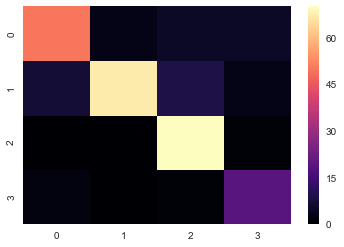

In [33]:
sns.heatmap(cm, cmap='magma')

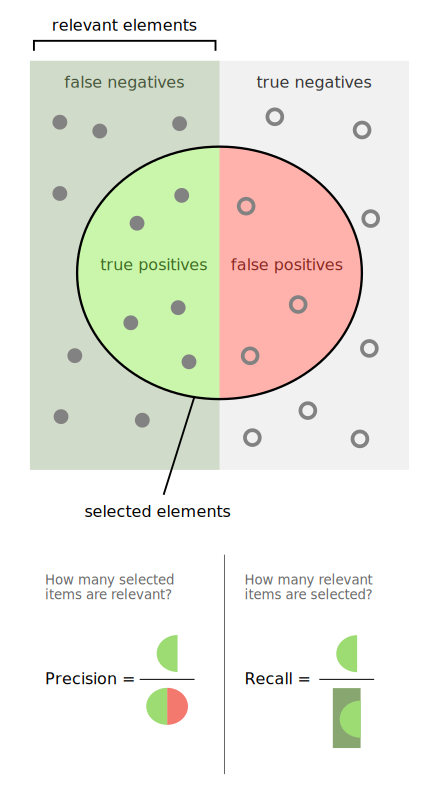

In [34]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg'))
show_svg()

In [35]:
cr = classification_report(y_test, y_pred_class)
print(cr)

             precision    recall  f1-score   support

          0       0.85      0.79      0.82        63
          1       0.96      0.78      0.86        86
          3       0.82      0.99      0.90        71
          4       0.68      0.86      0.76        22

avg / total       0.86      0.85      0.85       242



# Exploring the model

In [36]:
nb.feature_count_

array([[ 60.,   0.,  13., ...,   1.,   1.,  98.],
       [ 96.,   0.,  12., ...,   3.,   0.,   0.],
       [ 28.,   0.,  10., ...,   1.,   0.,   0.],
       [ 32.,   7.,   2., ...,   0.,   4.,   0.]])

In [37]:
dovish = nb.feature_count_[0,:]
little_dovish = nb.feature_count_[1,:]
little_hawkish = nb.feature_count_[2,:]
hawkish = nb.feature_count_[3,:]

In [38]:
X_train_tokens = vectorizer.get_feature_names()
tokens = pd.DataFrame({'dovish':dovish, 'dovish_little':little_dovish, 'hawkish_little':little_hawkish, 'hawkish':hawkish}, index=X_train_tokens)

In [92]:
tokens.sample(30, random_state=15)

,dovish,dovish_little,hawkish,hawkish_little
committee 2012 remains,7.0,0.0,0.0,0.0
residual,9.0,10.0,0.0,2.0
asset purchases forward,5.0,5.0,1.0,1.0
chicago fed president,5.0,0.0,1.0,1.0
equilibrium real rates,5.0,0.0,0.0,3.0
monetary policy decisions,9.0,8.0,0.0,13.0
2010 2013,2.0,4.0,0.0,2.0
8956 332,0.0,0.0,44.0,0.0
propose,4.0,0.0,1.0,1.0
dynamics,18.0,31.0,8.0,11.0


In [40]:
filtered_tokens = tokens[(tokens['dovish'] + tokens['dovish_little'] > 0) & (tokens['hawkish'] + tokens['hawkish_little'] > 0)]

In [41]:
filtered_tokens['hawkishness_score'] = (filtered_tokens['hawkish'] + filtered_tokens['hawkish_little'])/(filtered_tokens['dovish'] + filtered_tokens['dovish_little'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Hawkishness score ordered by descending

In [42]:
filtered_tokens.sort_values(by='hawkishness_score', ascending=False)

,dovish,dovish_little,hawkish,hawkish_little,hawkishness_score
james bullard,0.0,1.0,0.0,229.0,229.000000
bank richmond,0.0,1.0,107.0,1.0,108.000000
reserve bank richmond,0.0,1.0,107.0,1.0,108.000000
bullard,1.0,2.0,0.0,301.0,100.333333
st louis fed,1.0,1.0,0.0,165.0,82.500000
louis fed,1.0,1.0,0.0,165.0,82.500000
fred,0.0,1.0,0.0,76.0,76.000000
bullard president,0.0,1.0,0.0,76.0,76.000000
james bullard president,0.0,1.0,0.0,76.0,76.000000
convenient,0.0,1.0,2.0,74.0,76.000000


In [85]:
only_dovish = tokens[(tokens.dovish > 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish', ascending=False)
only_dovish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little > 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish_little', ascending=False)
only_hawkish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little > 0)].sort_values('hawkish_little', ascending=False)
only_hawkish = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish > 0) & (tokens.hawkish_little == 0)].sort_values('hawkish', ascending=False)

In [91]:
only_dovish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
zlb,98.0,0.0,0.0,0.0
goal oriented,28.0,0.0,0.0,0.0
notices,28.0,0.0,0.0,0.0
5322 copyright,26.0,0.0,0.0,0.0
5322,26.0,0.0,0.0,0.0
322 5322 copyright,26.0,0.0,0.0,0.0
322 5322,26.0,0.0,0.0,0.0
322,26.0,0.0,0.0,0.0
312 322 5322,26.0,0.0,0.0,0.0
312,26.0,0.0,0.0,0.0


In [87]:
only_dovish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
second district,0.0,97.0,0.0,0.0
working federal,0.0,96.0,0.0,0.0
reform hub,0.0,94.0,0.0,0.0
governance reform culture,0.0,94.0,0.0,0.0
culture reform hub,0.0,94.0,0.0,0.0
foster discussion corporate,0.0,94.0,0.0,0.0
foster discussion,0.0,94.0,0.0,0.0
reform culture,0.0,94.0,0.0,0.0
reform culture behavior,0.0,94.0,0.0,0.0
reform hub designed,0.0,94.0,0.0,0.0


In [88]:
only_hawkish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
assistant president,0.0,0.0,0.0,143.0
president james,0.0,0.0,0.0,78.0
president james bullard,0.0,0.0,0.0,78.0
emailed,0.0,0.0,0.0,76.0
latest curriculum,0.0,0.0,0.0,74.0
emailed monthly,0.0,0.0,0.0,74.0
speeches research lesson,0.0,0.0,0.0,74.0
emailed monthly charge,0.0,0.0,0.0,74.0
curriculum classroom,0.0,0.0,0.0,74.0
stay date,0.0,0.0,0.0,74.0


In [89]:
only_hawkish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
lacker,0.0,0.0,140.0,0.0
697,0.0,0.0,88.0,0.0
jeffrey lacker,0.0,0.0,85.0,0.0
332 0207,0.0,0.0,44.0,0.0
mobile laura,0.0,0.0,44.0,0.0
0207,0.0,0.0,44.0,0.0
bank richmond economic,0.0,0.0,44.0,0.0
fortunato 697 8196,0.0,0.0,44.0,0.0
fortunato 697,0.0,0.0,44.0,0.0
fortunato,0.0,0.0,44.0,0.0


# Logistic Regression model

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred_class = logreg.predict(X_test_dtm)

In [46]:
y_pred_prob = logreg.predict_proba(X_test_dtm)

In [47]:
y_pred_prob = y_pred_prob[:,1]

In [48]:
accuracy_score(y_test, y_pred_class)

0.83884297520661155

In [49]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78        63
          1       0.87      0.76      0.81        86
          3       0.92      0.99      0.95        71
          4       0.65      0.91      0.75        22

avg / total       0.85      0.84      0.84       242



#### I's a little worse, than the Naive Baiyes model
---